## K-Means Clustering

K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. The objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function: 

<img src='../../../img/Clustering_kmeans_c.png' height="600" width="800">

### Algorithm

1. Clusters the data into k groups where k  is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

<img src='../../../img/Clustering_kmeans.png'>

### Example:

Suppose we want to group the visitors to a website using just their age (one-dimensional space) as follows:

n = 19

15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65


Initial clusters (random centroid or average):

c1 = 16

c2 = 22

<img src='../../../img/kmeans_distance.png'>

<img src='../../../img/kmeans_t1.png'>

<img src='../../../img/kmeans_t2.png'>

<img src='../../../img/kmeans_t3.png'>

<img src='../../../img/kmeans_t4.png'>

No change between iterations 3 and 4 has been noted. By using clustering, 2 groups have been identified 15-28 and 35-65. The initial choice of centroids can affect the output clusters, so the algorithm is often run multiple times with different starting conditions in order to get a fair view of what the clusters should be.

K-Means is relatively an efficient method. However, we need to specify the number of clusters, in advance and the final results are sensitive to initialization and often terminates at a local optimum. Unfortunately there is no global theoretical method to find the optimal number of clusters. A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion or apply the so called ***"elbow method"*** heuristic shown below. In general, a large k probably decreases the error but increases the risk of overfitting.

### Code Dictionary
code | description
-----|------------
`.KMeans` | K-Means clustering.
`KMeans.inertia_` | Sum of squared distances of samples to their closest cluster center.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset = pd.read_csv('Mall_Customers.csv')

In [21]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
X = dataset.iloc[:, [3, 4]].values

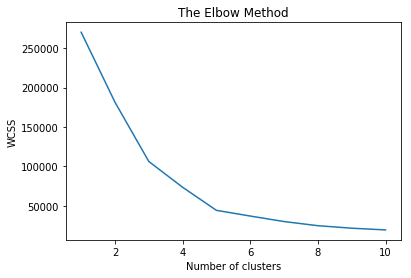

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

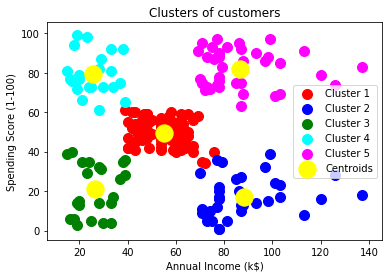

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Exercise

In [ ]:
# Make a cluster following the example on the pggm dataset using variables of GICS_Sector and Price_USD variable

In [8]:
import pandas as pd
import numpy as np

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [10]:
irisdata['GICS_Sector'].unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

In [12]:
from sklearn import preprocessing 

print("Samples: {}, Features: {}".format(*irisdata.shape))
 
le = preprocessing.LabelEncoder()
temp = irisdata['GICS_Sector']

le.fit(temp)
irisdata['Sector'] = le.transform(temp)#temp.apply(le.fit_transform)
irisdata.head()

Samples: 38304, Features: 18


,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Sector
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,6
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,10
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,6
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,6
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,10


C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


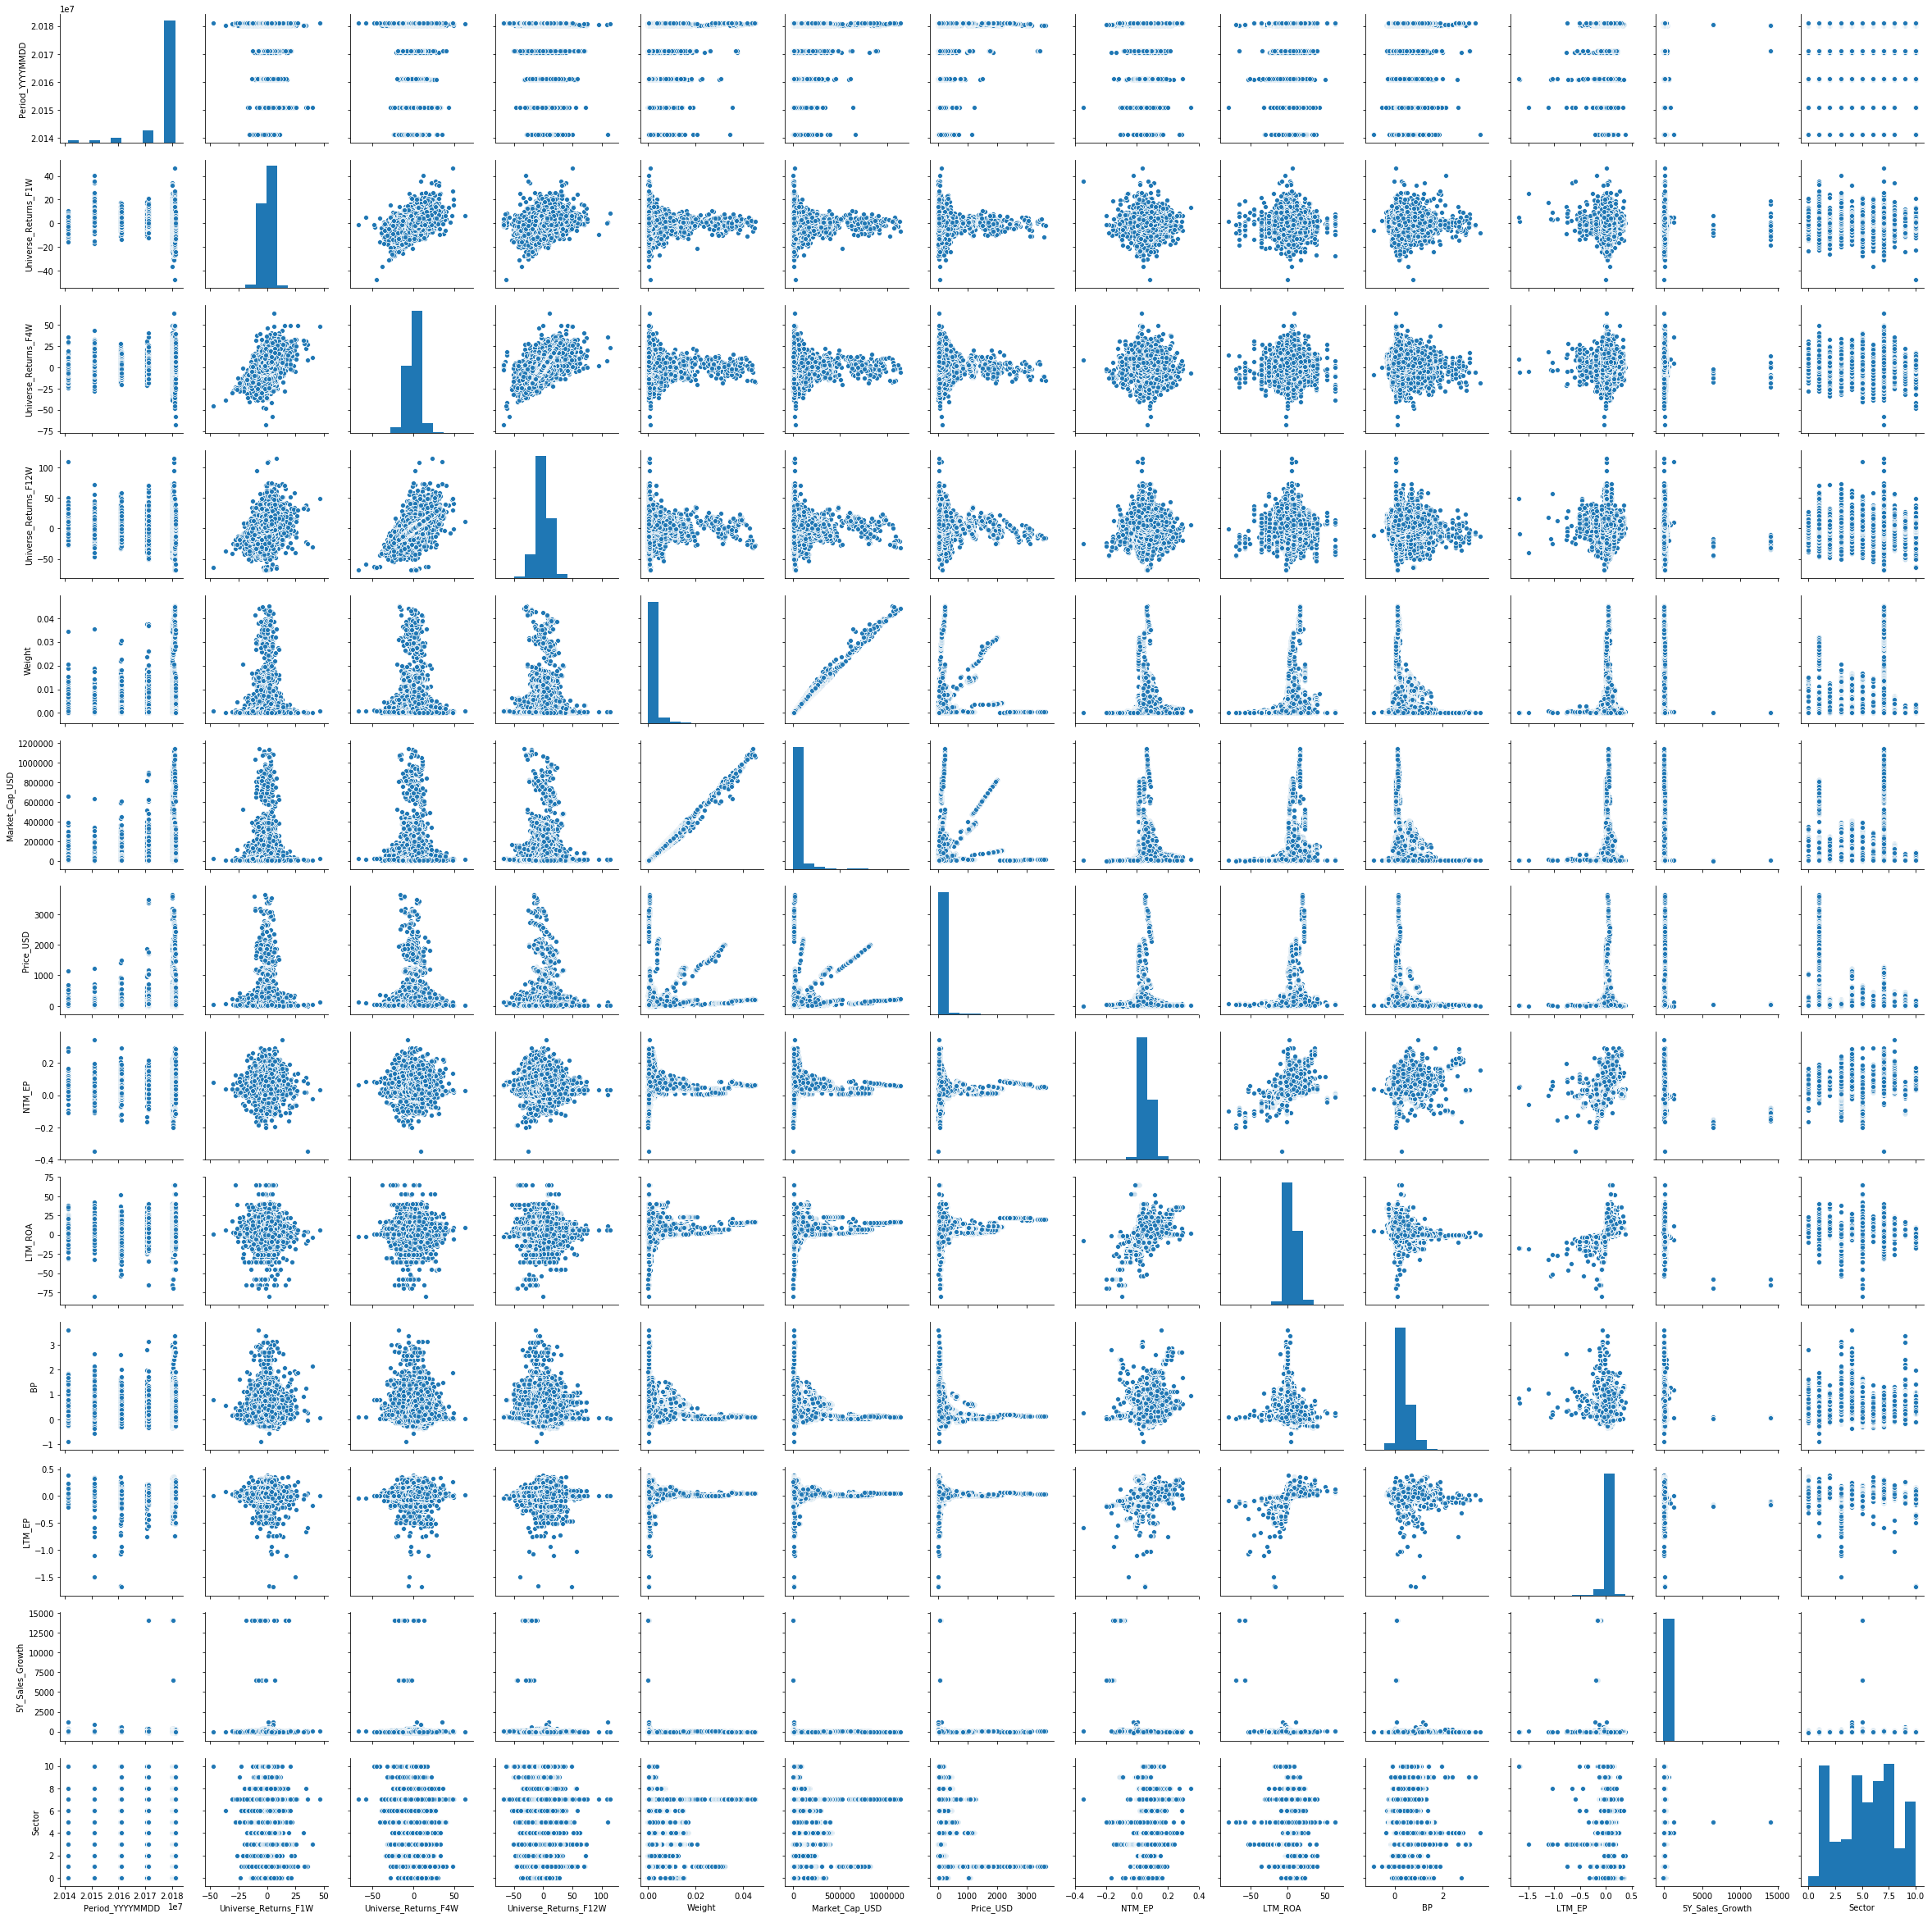

In [16]:
import seaborn as sns
g = sns.pairplot(irisdata, hue="Sector")
g

In [17]:
X = irisdata.iloc[:, [12, 18]].values

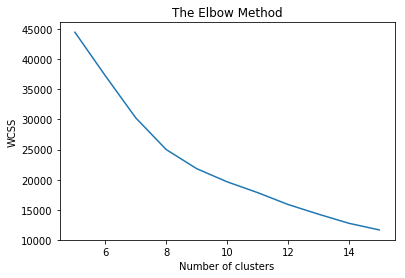

In [25]:
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

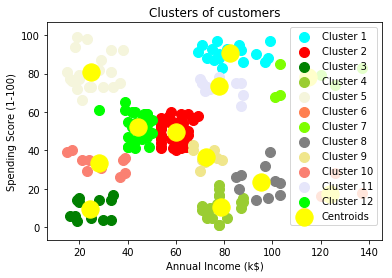

In [38]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Sector')
plt.legend()
plt.show()